<a href="https://colab.research.google.com/github/reema-dass26/work-prac/blob/main/dopp_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import re
import json
import warnings
import pycountry
warnings.filterwarnings("ignore")

In [299]:
task4_old=pd.read_csv('/content/sample_data/mydf_towork')
task4=pd.read_csv('/content/sample_data/mydf_forprediction')
country_list=task4['iso3'].unique()


capturing mean values in order to use it to fill na if no values are found

In [300]:
task4_mean_values = task4.mean(axis=0)
# task4_mean_values

filtering 0.0 as they have the actual values and rest go for prediction 

In [359]:
my_valid_values=[0.0]
task4_to_tr_te=task4.loc[task4['psr_comp_source'].isin(my_valid_values) ]
my_valid_values=[1.0,2.0]
to_predict_df=task4.loc[task4['psr_comp_source'].isin(my_valid_values) ]
len(to_predict_df.index)

5320

In [ ]:
# gov_exp_pc	illiterate_adult	illiterate_youth	gov_exp
# task4_to_train_test[task4_to_train_test['gov_exp_pc'].isnull()]
# middle_df['gov_exp_pc'].isnull().values.all()

In [302]:
task4_to_train_test=pd.DataFrame()
for i in country_list:
  middle_df=task4_to_tr_te.loc[task4_to_tr_te['iso3'] == i]
  middle_df.fillna(middle_df.mean(numeric_only=True), inplace=True) 
  task4_to_train_test=task4_to_train_test.append(middle_df, ignore_index = True)
print(len(task4_to_train_test.index))
  


5028


In [331]:
nan_cols = [i for i in task4_to_train_test.columns if task4_to_train_test[i].isnull().any()]


task4_to_train_test[nan_cols].isnull().values.any()
nan_cols


['gii',
 'gnipc',
 'le',
 'eys',
 'mys',
 'coef_ineq',
 'rural',
 'compulsory',
 'school_age_prim',
 'oo_school_prim']

In [332]:
nan_cols

['gii',
 'gnipc',
 'le',
 'eys',
 'mys',
 'coef_ineq',
 'rural',
 'compulsory',
 'school_age_prim',
 'oo_school_prim']

In [333]:
# if len(nan_cols)>0:
#   for i in nan_cols:
#     task4_to_train_test[i].replace(None,task4_mean_values[i],inplace=True)
    
# len(task4_to_train_test.index)
# task4_to_train_test[['gov_exp_pc', 'illiterate_adult', 'illiterate_youth', 'gov_exp']]

In [334]:
if len(nan_cols)>0:
  for i in nan_cols:
    task4_to_train_test[i].fillna(task4_mean_values[i], inplace=True)
  # task4_to_train_test=middle_df.copy()
len(task4_to_train_test.index)
# task4_to_train_test[['gov_exp_pc', 'illiterate_adult', 'illiterate_youth', 'gov_exp']]

,gov_exp_pc,illiterate_adult,illiterate_youth,gov_exp
0,230.582888,4.091834e+06,548541.762115,1.943455
1,230.582888,4.091834e+06,548541.762115,1.943455
2,230.582888,4.091834e+06,548541.762115,1.943455
3,230.582888,4.091834e+06,548541.762115,1.943455
4,230.582888,4.091834e+06,548541.762115,1.943455
...,...,...,...,...
5023,4970.009207,4.091834e+06,548541.762115,1.440225
5024,4970.009207,4.091834e+06,548541.762115,1.440225
5025,4970.009207,4.091834e+06,548541.762115,1.440225
5026,4970.009207,4.091834e+06,548541.762115,1.440225


In [233]:
# task4.dropna(inplace=True)
# task4=task4.reset_index()
# m_c_list= ["CHN","IDN","BRA","NGA","BGD","JPN","VNM","COD","IRN","FRA","MMR","KEN"]
# task4_without_to_predict_countries=task4[~task4['iso3'].isin  (m_c_list)]
# test=task4_without_to_predict_countries[task4_without_to_predict_countries['iso3'].isin  (m_c_list)]
# test
# task4_filled_missing_na = task4_without_to_predict_countries.copy()

# task4_filled_missing_na.fillna(task4_filled_missing_na.mean(numeric_only=True).round(1), inplace=True) 


In [335]:
task4_to_train_test.dtypes
nan_cols = [i for i in task4_to_train_test.columns if task4_to_train_test[i].isnull().all()]
nan_cols

len(task4_to_train_test.index)

5028

In [336]:
task4_to_train_test.isnull().values.any()
task4_to_train_test[task4_to_train_test.isna().any(axis=1)]

,Unnamed: 0,iso3,country,pop,year,ps_comp,psr_comp_source,gii,gnipc,gov_exp_pc,...,mys,coef_ineq,rural,compulsory,illiterate_adult,illiterate_youth,school_age_prim,oo_school_prim,gov_exp,iso_num


In [337]:
task4_to_train_test.keys()

Index(['Unnamed: 0', 'iso3', 'country', 'pop', 'year', 'ps_comp',
       'psr_comp_source', 'gii', 'gnipc', 'gov_exp_pc', 'le', 'eys', 'mys',
       'coef_ineq', 'rural', 'compulsory', 'illiterate_adult',
       'illiterate_youth', 'school_age_prim', 'oo_school_prim', 'gov_exp',
       'iso_num'],
      dtype='object')

In [338]:
for index, row in task4_to_train_test.iterrows():
    y=pycountry.countries.get(alpha_3=row['iso3'])
    task4_to_train_test.at[index,'iso_num'] = y.numeric

task4_to_train_test.keys()
len(task4_to_train_test.index)

5028

In [339]:
task4_to_train_test.dtypes


Unnamed: 0            int64
iso3                 object
country              object
pop                 float64
year                  int64
ps_comp             float64
psr_comp_source     float64
gii                 float64
gnipc               float64
gov_exp_pc          float64
le                  float64
eys                 float64
mys                 float64
coef_ineq           float64
rural               float64
compulsory          float64
illiterate_adult    float64
illiterate_youth    float64
school_age_prim     float64
oo_school_prim      float64
gov_exp             float64
iso_num              object
dtype: object

In [350]:
from sklearn.feature_selection import SelectPercentile,SelectKBest
from sklearn.feature_selection import chi2
# task4_to_train_test = task4_to_train_test.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

x=task4_to_train_test[[ 'iso_num', 'pop', 'year', 'gii', 'gnipc', 'gov_exp_pc', 'le', 'eys', 'mys',
       'coef_ineq', 'rural', 'compulsory', 'illiterate_adult',
       'illiterate_youth', 'school_age_prim', 'oo_school_prim', 'gov_exp'
       ]].copy()
y=task4_to_train_test[[ 'ps_comp']].copy()
# x.shape
# y=y.astype('int') 
# x = x.reset_index()
feature_names = SelectPercentile(percentile=50).fit(x, y)
important__features=feature_names.get_feature_names_out()
# print(important__features)
if 'iso_num' not in important__features:
  selected__features=np.append(important__features, ['iso_num'])
important__features=np.append(important__features, ['ps_comp','iso_num'])

print(important__features)

FS_task4_to_train_test=task4_to_train_test[important__features].copy()

FS_task4_to_train_test.keys()
len(task4_to_train_test.index) 

['pop' 'year' 'le' 'eys' 'coef_ineq' 'illiterate_youth' 'school_age_prim'
 'oo_school_prim' 'ps_comp' 'iso_num']


5028

In [351]:
from sklearn.model_selection import train_test_split
len(FS_task4_to_train_test.index)

5028

In [352]:


train, test = train_test_split(FS_task4_to_train_test, test_size=0.1)

train_x=train[selected__features]

train_y=train[[ 'ps_comp']]

test_x=test[selected__features]

test_y=test[['ps_comp']]

In [353]:

train_x

,pop,year,le,eys,coef_ineq,illiterate_youth,school_age_prim,oo_school_prim,iso_num
2141,319014.0,2011,82.178000,18.547359,5.462641,548541.762115,3.199600e+04,61.000000,352
3585,3495276.0,2008,76.224700,12.777290,21.081329,548541.762115,4.500215e+05,53307.500000,591
31,14439748.0,1972,71.947730,12.332351,19.564613,156217.000000,4.010073e+06,16077.200000,012
1171,743446.0,1986,77.969221,13.177182,10.130102,548541.762115,5.674725e+04,584.750000,196
3435,2076217.0,2018,77.314200,13.507330,10.706655,548541.762115,1.118590e+05,781.000000,807
...,...,...,...,...,...,...,...,...,...
1041,5123105.0,2020,79.277000,16.545771,16.957122,548541.762115,4.284680e+05,316.000000,188
1736,795563.0,1983,59.219254,7.425258,32.335503,132140.000000,3.630182e+05,60845.833333,270
1786,3717668.0,2013,72.628400,14.038430,12.651164,1761.000000,3.091544e+05,2938.400000,268
3852,4135579.0,1972,57.429830,9.394598,28.965554,326906.000000,1.860664e+06,64830.250000,646


In [354]:
# model = LinearRegression().fit(train_x, train_y)
# print(model.intercept_)
# y_pred=model.predict(test_x)

# y_pred=pd.DataFrame(y_pred, columns = ['ps_comp'])

# # y_pred['ps_comp']=y_pred['ps_comp'].apply(np.ceil)
# y_pred
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(train_x, train_y)

predict = clf.predict(test_x)
y_pred=pd.DataFrame(predict, columns = ['ps_comp'])

In [355]:
train_x

,pop,year,le,eys,coef_ineq,illiterate_youth,school_age_prim,oo_school_prim,iso_num
2141,319014.0,2011,82.178000,18.547359,5.462641,548541.762115,3.199600e+04,61.000000,352
3585,3495276.0,2008,76.224700,12.777290,21.081329,548541.762115,4.500215e+05,53307.500000,591
31,14439748.0,1972,71.947730,12.332351,19.564613,156217.000000,4.010073e+06,16077.200000,012
1171,743446.0,1986,77.969221,13.177182,10.130102,548541.762115,5.674725e+04,584.750000,196
3435,2076217.0,2018,77.314200,13.507330,10.706655,548541.762115,1.118590e+05,781.000000,807
...,...,...,...,...,...,...,...,...,...
1041,5123105.0,2020,79.277000,16.545771,16.957122,548541.762115,4.284680e+05,316.000000,188
1736,795563.0,1983,59.219254,7.425258,32.335503,132140.000000,3.630182e+05,60845.833333,270
1786,3717668.0,2013,72.628400,14.038430,12.651164,1761.000000,3.091544e+05,2938.400000,268
3852,4135579.0,1972,57.429830,9.394598,28.965554,326906.000000,1.860664e+06,64830.250000,646


In [356]:
from sklearn.metrics import r2_score
Accuracy=r2_score(test_y,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 95.40


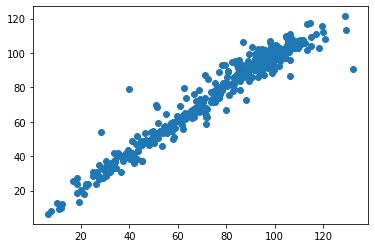

In [357]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
fig = plt.figure()
# fig.set_size_inches(12, 8)
# ax = fig.add_subplot(121)

# ax.set_xlabel('X-axis ')
# ax.set_ylabel('Y-axis ')

# ax.xaxis.label.set_color('yellow')        #setting up X-axis label color to yellow
# ax.yaxis.label.set_color('blue')          #setting up Y-axis label color to blue

# ax.tick_params(axis='x', colors='red')    #setting up X-axis tick color to red
# ax.tick_params(axis='y', colors='black')  #setting up Y-axis tick color to black

# ax.spines['left'].set_color('red')        # setting up Y-axis tick color to red
# ax.spines['top'].set_color('red')         #setting up above X-axis tick color to red
# for i in range(11):
#     r = np.round(np.random.rand(),1)
#     g = np.round(np.random.rand(),1)
#     b = np.round(np.random.rand(),1)
#     y = i + np.random.rand(100)*0.25
plt.scatter(test_y['ps_comp'],y_pred['ps_comp'])
# plt.annotate(f"({r}, {g}, {b})", (100, y[-1]))



plt.show()


# # fig = plt.figure()

# # ax = fig.add_subplot(121)
# warnings.filterwarnings("ignore")

# plt.scatter(test_y['ps_comp'],y_pred['ps_comp'],);
# plt.tick_params(axis='x', colors='red')    #setting up X-axis tick color to red
# plt.tick_params(axis='y', colors='black')
# plt.xlabel('Actual');
# plt.ylabel('Predicted');

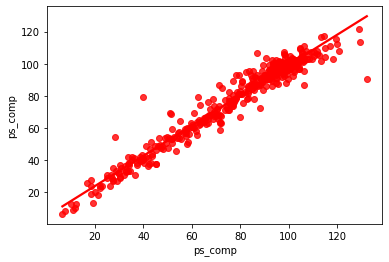

In [358]:
sns.regplot(x=test_y['ps_comp'],y=y_pred['ps_comp'],ci=None,color ='red');

In [ ]:
# pred_df=pd.DataFrame({'Actual Value':test_y,'Predicted Value':y_pred,'Difference':test_y-y_pred})


In [13]:
# task4_china=task4[task4['iso3']=='KEN']
# task4_china

,level_0,index,Unnamed: 0,iso3,country,pop,year,ps_comp,psr_comp_source,gii,...,eys,mys,coef_ineq,rural,compulsory,illiterate_adult,illiterate_youth,school_age_prim,oo_school_prim,gov_exp


China - no
IRN =1 -2016

KEN -no 